
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>
## <font color=red> Please don't rename this .ipynb file.</font><br>
- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

##LOAD DATA

In [2]:
X = np.load('./data/train_X.npy')
Y = np.array([np.load('./data/train_y.npy')]).T

In [ ]:
# print(X.shape)
# print(Y.shape)
# print(X[1, :])
# print(X)
# print(Y[:5])

Normalization / Standardization

In [3]:
def normalize(X):
  """
  Implement Normalization for input image features

  Args:
  X : numpy array of shape (n_samples, 784)
   
  Returns:
  X_norm : numpy array of shape (n_samples, 784) after normalization
  """
  X_norm = None
  
  ## TODO
  x_mean = np.mean(X, axis=0)
  x_std  = np.std(X, axis=0)
  X_norm = (X - x_mean)/ (x_std + 0.00001)
  
  ## END TODO

  assert X_norm.shape == X.shape

  return X_norm

def scaling(X):
  """
  Implement MinMax Scaling on input image features

  Args:
  X : numpy array of shape (n_samples, 784)
   
  Returns:
  X_scaled : numpy array of shape (n_samples, 784)
  """
  X_scaled = None

  ##TODO
  x_min = np.min(X, axis=0)
  x_max = np.max(X, axis=0)
  X_scaled = (X - x_min) / (x_max - x_min + 0.00001)
  
  ##END TODO
  
  assert X_scaled.shape == X.shape

  return X_scaled

In [ ]:
# print(normalize(X)[:5, :10])
# print(scaling(X)[:5, :10])

### Split data into train/val

In [4]:
def split_data(X, Y, train_ratio=0.8):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    # Try Normalization and scaling and store it in X_transformed
    X_transformed = X

    ## TODO

    X_transformed = normalize(X)
    # X_transformed = scaling(X)

    n_samples = X_transformed.shape[0]
    S = np.arange(n_samples)
    np.random.shuffle(S)
    X_ = X_transformed[S]
    Y_ = Y[S]

    dim = X_.ndim
    if dim  ==1:
      X_ = X_.reshape(-1, 1)

    train_size = int(np.floor(n_samples*train_ratio))
    X_train = X_[:train_size,:]
    Y_train = Y_[:train_size]
    X_val = X_[train_size:,:]
    Y_val = Y_[train_size:]
    
    ## END TODO

    assert X_transformed.shape == X.shape

    num_samples = len(X)
    indices = np.arange(num_samples)
    num_train_samples = math.floor(num_samples * train_ratio)
    train_indices = np.random.choice(indices, num_train_samples, replace=False)
    val_indices = list(set(indices) - set(train_indices))
    X_train, Y_train, X_val, Y_val = X_transformed[train_indices], Y[train_indices], X_transformed[val_indices], Y[val_indices]
  
    return X_train, Y_train, X_val, Y_val

**Plotting image**

In [5]:
def plot_image(x, y, idx):
  """
  Plot the given feature vector into image of size 28 X 28 
  note that originally the image was of size 28*28 which is flattened or unrolled
  to 784 X 1 feature vector

  Args:
  x : numpy array of images
  y : numpy array of ground truth labels for images
  idx : index of the image
  """

  image = np.reshape(x[idx], (28,28))
  plt.imshow(image, interpolation='nearest')
  plt.show()
  print (f'The ground truth label for this iamge is : {y[idx]}')

Encode 1 for any one of the class and 0 to all other remaining class for all labels

In [6]:
def get_data_for_class(X,Y,id):
  """
  Args:
  X : numpy array of input features, shape - (n_samples x 784)
  Y : numpy array of input targets, shape - (n_samples x 1)
  id : class id (one of 1,4,7,9)

  Returns:
  class_X : numpy array of input features, shape - (n_samples x 784)
  class_Y : numpy array of input targets, where class_Y[i]=1 if Y[i]=id else class_Y[i]=0, shape - (n_samples x 784)
  """
  class_X, class_Y = None, None

  ##TODO
  class_X = X
  class_Y = Y == id
  ##END TODO

  assert class_X.shape == X.shape and class_Y.shape == Y.shape

  return class_X, class_Y

Random Sampling

In [7]:
def sample_training_points(X, y, sample_size):
  """
  Takes input features, targets and sample size, and returns random sample of size = sample_size

  Args: 
  X : numpy array of shape (n_samples , n_features)
  y : numpy array of shape (n_samples , 1)
  
  Returns: 
  sampled_X : numpy array of shape (sample_size , n_eatures)
  sampled_y : numpy array of shape (sample_size , 1)

  """
  sampled_X , sampled_y = None, None
  
  ##TODO
  n_samples = X.shape[0]
  S = np.arange(n_samples)
  np.random.shuffle(S)
  X_random = X[S]
  Y_random = y[S]

  sampled_X = X_random[:sample_size,:]
  sampled_y = Y_random[:sample_size]
 
  ##END TODO

  assert sampled_X.shape==(sample_size,X.shape[1]) and sampled_y.shape==(sample_size,1)
  
  return sampled_X, sampled_y

LOGISTIC REGRESSION CLASSIFIER

In [8]:
def sigmoid(weights, bias, X):
  """
  Implement logistic/ sigmoid function

  Args:
  weights : numpy array of shape (n_dimension , 1)
  bias : scaler
  X : numpy array of shape (n_samples , n_dimension)

  Returns: 
  Y_sigmoid : numpy array of shape (n_samples, 1)
  """
  Y_sigmoid = None

  ##TODO

  y =  X @ weights + bias  
  Y_sigmoid = 1.0 / (1.0 + np.exp(-y))
  
  ##END TODO
  assert Y_sigmoid.shape == (X.shape[0],1)

  return Y_sigmoid


def cross_entropy_loss(weights, bias, X, y):
  """
  Takes input features, weights, bias and target 
  and calculates binary cross entropy loss between y and predicted values of y.

  Args:
  weights : numpy array of shape (n_features, 1)
  bias : scalar
  X : numpy array of shape (n_samples, 1)
  y : numpy array of shape (n_samples, 1)
  
  Returns :
  loss : single float value
  """
  loss = 0.0

  ##TODO
  n_samples = X.shape[0]
  p_Y_hat = sigmoid(weights, bias, X)
  entropy = (y.T @ np.log(p_Y_hat + 0.000001))
  loss = entropy + (1- y.T) @ np.log( 1 - p_Y_hat + 0.000001)
  loss = - loss[0][0] /(1.0*n_samples)
  
  ##END TODO

  return loss

def grad(X, y, weights, bias):

  """
  Return gradient for weights and biases

  Args:
  X : numpy array of shape (n_samples , n_dimension)
  y : numpy array of shape (n_samples , 1)
  weights : numpy array of shape (n_dimension , 1)
  bias : scalar

  Returns: 
  gradient : [dw , db]
              dw - numpy array of shape (n_dimension , 1)
              db - numpy array of shape (1)
  """

  dw , db = None , None

  ##TODO
  n_samples = X.shape[0]
  Y_hat = sigmoid(weights, bias, X)
  delta_w = X.T @ (Y_hat - y)
  dw = delta_w /(1.0* n_samples)

  ones_mat = np.ones(X.shape[0], float).reshape(-1, 1)
  delta_b = Y_hat - y
  # print(delta_b.T.shape, ones_mat.shape)
  delta_b = delta_b.T @ ones_mat
  db = delta_b[0][0] /(1.0*n_samples)
  
  ##END TODO

  assert dw.shape == weights.shape 
  assert isinstance(db, float)

  gradient = [dw , db]

  return gradient

def logistic_regression(X, y, epoch, lr, sample_size):
  """
  Args :

  X : numpy array of inpuy features of shape (n_samples, n_features)
  y : numpy array of targets of shape (n_samples, 1)
  epochs : number of iterations of training
  lr : learning_rate
  sample_size : batch_size for each iteration

  Returns : 
  loss : list containg loss for each epoch
  weights : numpy array of shape (n_features, 1)
  bias :  scaler
  """

  loss, weights, bias = [], None, 0
  #define weights and bias (w, b) initialize the weight

  ##TODO
  weights = np.zeros(784, float).reshape(-1, 1)

  for i in range(0, epoch):
    X_sample, Y_sample = sample_training_points(X, y, sample_size)
    # print("X_sample", X_sample)
    # print("Y_sample", Y_sample)

    gradient  = grad(X_sample, Y_sample, weights, bias)
    d_w, d_b = gradient[0], gradient[1]

    # print("gradient", d_w[:5, :], d_b)

    weights = weights - lr*d_w
    bias = bias - lr*d_b
    loss_sample = cross_entropy_loss(weights, bias, X, y)
    # print("loss", loss_sample)
    # print("weights", weights[:5,:])
    # print("bias", bias)

    loss.append(loss_sample)

  ##TODO
  assert len(loss) == epoch and weights.shape == (X.shape[1],1)

  return [loss, weights, bias]

def train_multi_class(X, Y):
  """
  make multi class classifier using binary classification (1 vs all)

  Args:
  X : numpy array of input features of shape (n_samples, n_features)
  Y : numpy array of input features of shape (n_samples, 1)

  Returns:

  param_list : list of param for all classifiers, where param = [weights, bias]
  loss_list : list of lists of losses of all classifiers for all epochs
  """

  digits = [1,4,7,9]
  param_list = []
  loss_list = []


  #train i vs all weights and bias, where i in {1,4,7,9}
  epochs , lr , sample_size = 500, 0.01, 120
  # epochs , lr , sample_size = 5, 0.01, 10

  for i in digits:
    X_train, Y_train = get_data_for_class(X, Y, id=i)
    # print(Y_train)
    output = logistic_regression(X_train, Y_train, epochs, lr, sample_size)
    param_list.append(output[1:]) 
    loss_list.append(output[0])   

  return param_list, loss_list

In [ ]:
# print(loss_list)
# print(len(param_lists))
# print(len(param_lists[0]))
# print(param_lists[0][0].shape)
# print(param_lists[0][1])

In [9]:
def to_class(predicts):
  """
  Args: 
  predicts : numpy array of shape (n_samples, 4)
  
  Return:
  predicted classes : numpy array of shape(num_samples, class_id), where class_id in {1,4,7,9}
  
  """
  labels = {0:1, 1:4, 2:7, 3:9}
  predicted_class = []
  for i in range(predicts.shape[0]):
    label = np.argmax(predicts[i])
    predicted_class.append(labels[label])

  return np.array(predicted_class).reshape(len(predicted_class),1)

def prediction(param, X):
  """
  It return the array of predicted class for all samples in X                                    

  Args: 
  param[0] = [w,b] of class 1 vs all
  param[1] = [w,b] of class 4 vs all
  param[2] = [w,b] of class 7 vs all
  param[3] = [w,b] of class 9 vs all

  X = numpy array of input features, shape (n_samples , 784)

  Returns:
  predicts = numpy array for shape (n_samples , 4), 
             where predicts[i][j] is probablity that sample i belongs to class j when using classifer j vs all

  """

  predicts = None

  ##TODO
  ones_mat = np.ones(X.shape[0], float)
  X_ones  = np.append(X, ones_mat.reshape(-1, 1), axis = 1)

  param_mat = np.array(param)
  pw = param_mat[0][0].reshape(1, 784)
  pw1 = param_mat[1][0].reshape(1, 784)
  pw2 = param_mat[2][0].reshape(1, 784)
  pw3 = param_mat[3][0].reshape(1, 784)
  pb = param_mat[:, 1].reshape(4,1)

  final_w = np.concatenate((pw, pw1, pw2, pw3), axis=0)
  final_param = np.concatenate((final_w, pb), axis=1)
  # print(final_param.shape)
  # print(pb)

  predicts = X_ones @ final_param.T
  
  ##END TODO
  assert predicts.shape == (X.shape[0],4)

  return predicts


In [10]:
def accuracy(Y_pred, Y_true):

  '''
  This functions calculates accuracy for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

  Args:
  Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
  Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

  Returns:
  list of length 5, 1 st value is overall accuracy followed by accuracy of all 4 individual classifies
  '''
  
  total_accuracy = np.sum(Y_pred==Y_true)/Y_true.shape[0]
  accuracy_1 , accuracy_4 , accuracy_7 , accuracy_9 = 0, 0, 0, 0
  #TODO
  tot_count = [0, 0, 0, 0]
  correct_count = [0, 0, 0, 0]
  for i in range(len(Y_true)):
    if Y_true[i] == 1:
      tot_count[0] += 1
      if Y_pred[i] == 1:
        correct_count[0] += 1
    elif Y_true[i] == 4:
      tot_count[1] += 1
      if Y_pred[i] == 4:
        correct_count[1] += 1
    elif Y_true[i] == 7:
      tot_count[2] += 1
      if Y_pred[i] == 7:
        correct_count[2] += 1
    elif Y_true[i] == 9:
      tot_count[3] += 1
      if Y_pred[i] == 9:
        correct_count[3] += 1
  accuracy_1 = 1.0*correct_count[0] / (1.0*tot_count[0])
  accuracy_4 = 1.0*correct_count[1] / (1.0*tot_count[1])
  accuracy_7 = 1.0*correct_count[2] / (1.0*tot_count[2])
  accuracy_9 = 1.0*correct_count[3] / (1.0*tot_count[3])

  ##END TO

  print("Total Accuray : ", total_accuracy) 
  print("Accuray class 1 : ", accuracy_1) 
  print("Accuray class 4 : ", accuracy_4) 
  print("Accuray class 7 : ", accuracy_7) 
  print("Accuray class 9 : ", accuracy_9) 

  return [total_accuracy, accuracy_1, accuracy_4, accuracy_7, accuracy_9]

In [12]:
def calculate_metrics(Y_pred, Y_true):

  '''
  This functions calculates precision, recall and f1-score for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

  Args:
  Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
  Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

  Returns:
  (precision , recall , f1_score) : a tuple of 3 lists i.e. precison, recall and f1_score where
          precision : list of length 5, 1 st value is overall precison followed by precision of all 4 individual classes
          recall : list of length 5, 1 st value is overall recall followed by recall of all 4 individual classes
          f1_score : list of length 5, 1 st value is overall f1-score followed by f1-score of all 4 individual classes
  '''

  precision , recall , f1_score = [], [] ,[]

  ## TODO
  precision , recall , f1_score = [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]
  TP = [0, 0, 0, 0]
  FP = [0, 0, 0, 0]
  FN = [0, 0, 0, 0]
  for i in range(len(Y_true)):
    if Y_pred[i] == 1 and Y_true[i] == 1:
      TP[0] +=1
    elif Y_pred[i] == 4 and Y_true[i] == 4:
      TP[1] +=1
    elif Y_pred[i] == 7 and Y_true[i] == 7:
      TP[2] +=1
    elif Y_pred[i] == 9 and Y_true[i] == 9:
      TP[3] +=1
    elif Y_pred[i] == 1 and Y_true[i] != 1:
      FP[0] +=1
    elif Y_pred[i] == 4 and Y_true[i] != 4:
      FP[1] +=1
    elif Y_pred[i] == 7 and Y_true[i] != 7:
      FP[2] +=1
    elif Y_pred[i] == 9 and Y_true[i] != 9:
      FP[3] +=1
    elif Y_pred[i] != 1 and Y_true[i] == 1:
      FN[0] +=1
    elif Y_pred[i] != 4 and Y_true[i] == 4:
      FN[1] +=1
    elif Y_pred[i] != 7 and Y_true[i] == 7:
      FN[2] +=1
    elif Y_pred[i] != 9 and Y_true[i] == 9:
      FN[3] +=1
  
  precision[0] = 1.0*np.sum(TP) /(np.sum(TP) +  np.sum(FP))
  recall[0]    = 1.0*np.sum(TP) /(np.sum(TP) +  np.sum(FN))
  f1_score[0]  = 2.0*precision[0]*recall[0]/(recall[0]+precision[0])
  for i in range(0, 4):
    precision[i+1] = 1.0*TP[i] / (TP[i] + FP[i])
    recall[i+1]    = 1.0*TP[i] / (TP[i] + FN[i])
    f1_score[i+1]  = 2.0*precision[i+1]*recall[i+1]/(recall[i+1]+precision[i+1])

  ## END TODO

  assert len(precision)==5 and len(recall)==5 and len(f1_score)==5

  return (precision, recall, f1_score)

In [11]:
X_train, Y_train, X_val, Y_val = split_data(X,Y)
param_lists, loss_list = train_multi_class(X_train, Y_train)

In [13]:
def plot_training_loss(loss_list):
  labels = ["1", "4", "7", "9"]
  for ids, loss in enumerate(loss_list):
    plt.plot(loss, label = labels[ids])
  plt.legend(loc='best')
  plt.title('Training Loss of each class (1 vs all)')
  plt.show()

## Plot curve for loss

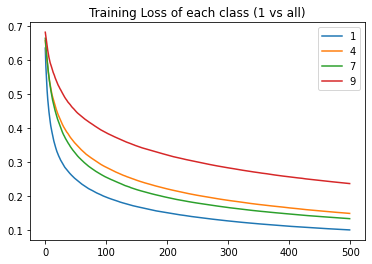

In [14]:
plot_training_loss(loss_list)
# print(loss_list)

In [15]:
Y_pred = to_class( prediction(param_lists, X_val) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


## Calculate accuracy, precision , recall and F1-score

In [16]:
accuracy(Y_pred, Y_val)

Total Accuray :  0.925
Accuray class 1 :  1.0
Accuray class 4 :  0.9468085106382979
Accuray class 7 :  0.9074074074074074
Accuray class 9 :  0.845360824742268


[0.925, 1.0, 0.9468085106382979, 0.9074074074074074, 0.845360824742268]

In [17]:
precision, recall, f1_score = calculate_metrics(Y_pred, Y_val)

In [18]:
# print("precision", precision)
# print("recall", recall)
# print("f1_score", f1_score)

precision [0.925, 0.9351851851851852, 0.9175257731958762, 0.9423076923076923, 0.9010989010989011]
recall [1.0, 1.0, 1.0, 1.0, 1.0]
f1_score [0.961038961038961, 0.9665071770334929, 0.956989247311828, 0.9702970297029703, 0.9479768786127168]
